# ** Part 0: Load the datasets required for the project **

We will load four datasets for this project. In addition to the four datasets, we will also load two lists which contain names by gender. These lists are helpful in assigning a gender to a Yelp user by their name, since gender is not available in the Yelp dataset.

Let's first start by creating the SparkContext.

In [1]:
import sys
sys.path.append("/opt/packages/spark/latest/python/lib/py4j-0.10.7-src.zip")
sys.path.append("/opt/packages/spark/latest/python/")
sys.path.append("/opt/packages/spark/latest/python/pyspark")
from pyspark import SparkConf, SparkContext
sc = SparkContext()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [2]:
import json
import os
import sys
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# helper function to load a JSON dataset from a publicly accessible url
def get_rdd_from_path(path):
    file_reader = open(path, 'r')
    str_contents = file_reader.readlines()
    json_contents = [json.loads(x.strip()) for x in str_contents]
    rdd = sc.parallelize(json_contents)
    return rdd

The first dataset we are going to load is information about Yelp businesses. The information of each business will be stored as a Python dictionary within an RDD. The dictionary consists of the following fields:

* "business_id":"encrypted business id"
* "name":"business name"
* "neighborhood":"hood name"
* "address":"full address"
* "city":"city"
* "state":"state -- if applicable --"
* "postal code":"postal code"
* "latitude":latitude
* "longitude":longitude
* "stars":star rating, rounded to half-stars
* "review_count":number of reviews
* "is_open":0/1 (closed/open)
* "attributes":["an array of strings: each array element is an attribute"]
* "categories":["an array of strings of business categories"]
* "hours":["an array of strings of business hours"]
* "type": "business"

In [3]:
# load the data about Yelp businesses in an RDD
# each RDD element is a Python dictionary parsed from JSON using json.loads()
businesses_rdd = get_rdd_from_path('/pylon5/ci5619p/kushagra/yelp_academic_dataset_business_small.json')
print (businesses_rdd.count())
print (businesses_rdd.take(2))

10000
[{'business_id': 'vcNAWiLM4dR7D2nwwJ7nCA', 'full_address': '4840 E Indian School Rd\nSte 101\nPhoenix, AZ 85018', 'hours': {'Tuesday': {'close': '17:00', 'open': '08:00'}, 'Friday': {'close': '17:00', 'open': '08:00'}, 'Monday': {'close': '17:00', 'open': '08:00'}, 'Wednesday': {'close': '17:00', 'open': '08:00'}, 'Thursday': {'close': '17:00', 'open': '08:00'}}, 'open': True, 'categories': ['Doctors', 'Health & Medical'], 'city': 'Phoenix', 'review_count': 9, 'name': 'Eric Goldberg, MD', 'neighborhoods': [], 'longitude': -111.983758, 'state': 'AZ', 'stars': 3.5, 'latitude': 33.499313, 'attributes': {'By Appointment Only': True}, 'type': 'business'}, {'business_id': 'UsFtqoBl7naz8AVUBZMjQQ', 'full_address': '202 McClure St\nDravosburg, PA 15034', 'hours': {}, 'open': True, 'categories': ['Nightlife'], 'city': 'Dravosburg', 'review_count': 4, 'name': "Clancy's Pub", 'neighborhoods': [], 'longitude': -79.88693, 'state': 'PA', 'stars': 3.5, 'latitude': 40.350519, 'attributes': {'Hap

The second dataset we are going to load is information about Yelp users. Each user's information will be stored as a Python dictionary within an RDD. The dictionary consists of the following fields:

*  "user_id":"encrypted user id"
*  "name":"first name"
*  "review_count":number of reviews
*  "yelping_since": date formatted like "2009-12-19"
*  "friends":["an array of encrypted ids of friends"]
*  "useful":"number of useful votes sent by the user"
*  "funny":"number of funny votes sent by the user"
*  "cool":"number of cool votes sent by the user"
*  "fans":"number of fans the user has"
*  "elite":["an array of years the user was elite"]
*  "average_stars":floating point average like 4.31
*  "compliment_hot":number of hot compliments received by the user
*  "compliment_more":number of more compliments received by the user
*  "compliment_profile": number of profile compliments received by the user
*  "compliment_cute": number of cute compliments received by the user
*  "compliment_list": number of list compliments received by the user
*  "compliment_note": number of note compliments received by the user
*  "compliment_plain": number of plain compliments received by the user
*  "compliment_cool": number of cool compliments received by the user
*  "compliment_funny": number of funny compliments received by the user
*  "compliment_writer": number of writer compliments received by the user
*  "compliment_photos": number of photo compliments received by the user
*  "type":"user"

In [4]:
# load the data about Yelp users in an RDD
# each RDD element is a Python dictionary parsed from JSON using json.loads()
users_rdd = get_rdd_from_path('/pylon5/ci5619p/kushagra/yelp_academic_dataset_user_small.json')
print (users_rdd.count())
print (users_rdd.take(2))

10000
[{'yelping_since': '2004-10', 'votes': {'funny': 166, 'useful': 278, 'cool': 245}, 'review_count': 108, 'name': 'Russel', 'user_id': '18kPq7GPye-YQ3LyKyAZPw', 'friends': ['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bxU-YA', 'fHtTaujcyKvXglE33Z5yIw', '8J4IIYcqBlFch8T90N923A', 'wy6l_zUo7SN0qrvNRWgySw', 'HDQixQ-WZEV0LVPJlIGQeQ', 'T4kuUr_iJiywOPdyM7gTHQ', 'z_5D4XEIlGAPjG3Os9ix5A', 'i63u3SdbrLsP4FxiSKP0Zw', 'pnrGw4ciBXJ6U5QB2m0F5g', 'ytjCBxosVSqCOQ62c4KAxg', 'r5uiIxwJ-I-oHBkNY2Ha3Q', 'niWoSKswEbooJC_M7HMbGw', 'kwoxiKMyoYjB1wTCYAjYRg', '9A8OuP6XwLwnNb9ov3_Ncw', '27MmRg8LfbZXNEHkEnKSdA', 'Bn4sJUTtKFZQt0FKHF2Adw', 'uguXfIEpI65jSCH5MgUDgA', '6VZNGc2h2Bn-uyuEXgOt5g', 'AZ8CTtwr-4sGM2kZqF6qig', 'S742m-AuQicMSLDdErrLZQ', 'uGmQ6ab4iVpWn5m61VFhkQ', 'GJYJX4SujVj3BR8v2F9PDQ', '3shjifK-vZkIHciyy_KbYA', '4lc_H2Cf7CO0tCgyA3aSVQ', 'Tunkp_F1R_uFBJQTsDxD4g', 'B9pKfr27czBbCoAIircZdQ', 'pePGMO6EbDpbaZ7D2m6HIg', 'XRM8W6HUoXbrYKR3BCj9Rg', '8DqIWXsKXOipfduYEfFpNw', 'dvRVX54Z9f7Om51NsTRX1w', 'CM0saLQmk4oAB17U

The third dataset we are going to load is information about business checkins reported by users on Yelp. Each checkin's information will be stored as a Python dictionary within an RDD. The dictionary consists of the following fields:

*  "checkin_info":["an array of check ins with the format day-hour:number of check ins from hour to hour+1"]
*  "business_id":"encrypted business id"
*  "type":"checkin"

In [5]:
# load the data about business checkins reported by users on Yelp in an RDD
# each RDD element is a Python dictionary parsed from JSON using json.loads()
checkins_rdd = get_rdd_from_path('/pylon5/ci5619p/kushagra/yelp_academic_dataset_checkin_small.json')
print (checkins_rdd.count())
print (checkins_rdd.take(2))

10000
[{'checkin_info': {'9-5': 1, '7-5': 1, '13-3': 1, '17-6': 1, '13-0': 1, '17-3': 1, '10-0': 1, '18-4': 1, '14-6': 1}, 'type': 'checkin', 'business_id': 'cE27W9VPgO88Qxe4ol6y_g'}, {'checkin_info': {'22-5': 1, '9-5': 1, '15-1': 1, '15-4': 1, '16-2': 1, '21-4': 1, '13-1': 1, '14-4': 1, '12-5': 1, '12-1': 1}, 'type': 'checkin', 'business_id': 'mVHrayjG3uZ_RLHkLj-AMg'}]


The fourth dataset we are going to load is information about business reviews written by users on Yelp. Each review's data will be stored as a Python dictionary within an RDD. The dictionary consists of the following fields:

*  "review_id":"encrypted review id"
*  "user_id":"encrypted user id"
*  "business_id":"encrypted business id"
*  "stars":star rating rounded to half-stars
*  "date":"date formatted like 2009-12-19"
*  "text":"review text"
*  "useful":number of useful votes received
*  "funny":number of funny votes received
*  "cool": number of cool review votes received
*  "type": "review"

In [6]:
# load the data about business reviews written by users on Yelp in an RDD, limited to businesses in Pittsburgh due to DataBricks computational limits
# each RDD element is a Python dictionary parsed from JSON using json.loads()
reviews_rdd = get_rdd_from_path('/pylon5/ci5619p/kushagra/yelp_academic_dataset_review_pittsburgh_small.json')
print (reviews_rdd.count())
print (reviews_rdd.take(2))

10000
[{'votes': {'funny': 3, 'useful': 7, 'cool': 7}, 'user_id': 'JbAeIYc89Sk8SWmrBCJs9g', 'review_id': 'fBQ69-NU9ZyTjjS7Tb5tww', 'stars': 5, 'date': '2013-06-10', 'text': "THANK YOU ROB! i truly appreciated all the help i received from this agent today who was able to removed the extra charges on my bill that the Pasadena Verizon Store on Lake was charging me on my bill for upgrading my phone.   When i went in i was having problems with my Blacberry and had to switch to the Iphone last week. Rob from the Pennsylvania store who i was connected today was able to look at my bill and all the notes and correct the problem immediately. Great Customer Service! He even set up a FOLLOW UP Phone Call with me On July 5th to make sure the credit goes through on my bill...I can't thank him enough!!!!", 'type': 'review', 'business_id': 'HZdLhv6COCleJMo7nPl-RA'}, {'votes': {'funny': 1, 'useful': 1, 'cool': 1}, 'user_id': 'l_szjd-ken3ma6oHDkTYXg', 'review_id': 'CFiLh7WvH7dM3qVZvNiacQ', 'stars': 2, '

Finally, we will load two lists. The first list consists of male names, and the second list consists of female names, to map Yelp user names to gender.

In [7]:
# helper function to load a list of names from a publicly accessible url
def get_names_from_path(path):
    file_reader = open(path, 'r')
    str_contents = file_reader.readlines()
    str_contents = [x.strip() for x in str_contents]
    result = str_contents[6:]
    return result

male_names = get_names_from_path('/pylon5/ci5619p/benh/male.txt')
print('First five male names: ', male_names[:5])
print('Number of male names: ', len(male_names))

female_names = get_names_from_path('/pylon5/ci5619p/benh/female.txt')
print('First five female names: ', female_names[:5])
print('Number of female names: ', len(female_names))

First five male names:  ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot']
Number of male names:  2943
First five female names:  ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']
Number of female names:  5001


# ** Part 1: Exploratory Data Analysis **

Performing some exploratory analysis is a great step toward understanding the data before building any statistical machine learning models on it.

Please replace `<FILL IN>` with your solution. This is the general form that exercises will take. Exercises will include an explanation of what is expected, followed by code cells where one cell will have one or more `<FILL IN>` sections.  The cell that needs to be modified will have `# TODO: Replace <FILL IN> with appropriate code` on its first line.

In [8]:
print ('Number of businesses: ', businesses_rdd.count())
print ('Number of users: ', users_rdd.count())
print ('Number of checkins: ', checkins_rdd.count())
print ('Number of reviews: ', reviews_rdd.count())

Number of businesses:  10000
Number of users:  10000
Number of checkins:  10000
Number of reviews:  10000


** Question: ** Print the top 5 business categories by frequency and the number of times they appear in the businesses data.

In [9]:
# TODO: Replace <FILL IN>
business_catcount=businesses_rdd.flatMap(lambda x:x['categories']).map(lambda x: (x,1)).reduceByKey(lambda a, b: a+b)
print(business_catcount.takeOrdered(5,lambda x: -1*x[1]))

[('Restaurants', 3216), ('Shopping', 1810), ('Food', 959), ('Health & Medical', 712), ('Beauty & Spas', 704)]


** Question: ** Print the top 5 cities by frequency and the number of times they appear in the businesses data.

In [10]:
# TODO: Replace <FILL IN>
business_citycount=businesses_rdd.map(lambda x:(x['city'],1)).reduceByKey(lambda a, b: a+b)
print(business_citycount.takeOrdered(5,lambda x: -1*x[1]))

[('Phoenix', 1954), ('Las Vegas', 1337), ('Charlotte', 1278), ('Pittsburgh', 979), ('Scottsdale', 640)]


** Question: ** Plot the histogram of stars received by businesses.

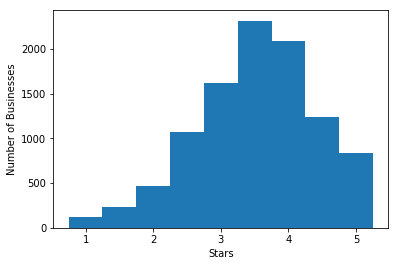

In [11]:
# TODO: Replace <FILL IN>

businesses_stars_counts = businesses_rdd.map(lambda x:x['stars']).collect()
plt.hist(businesses_stars_counts, bins=[x/2-0.25 for x in range(2, 12)])
plt.xlabel('Stars')
plt.ylabel('Number of Businesses')

** Question: ** Plot the histogram of number of reviews received by businesses.

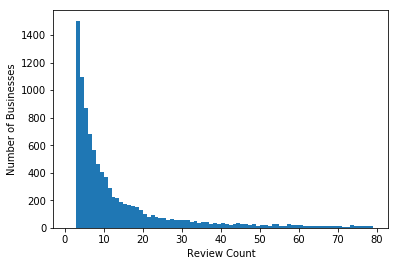

In [12]:
# TODO: Replace <FILL IN>

businesses_review_counts = businesses_rdd.map(lambda x:x['review_count']).collect()

hist, bins, _=plt.hist(businesses_review_counts, bins=range(1,80))
plt.xlabel('Review Count')
plt.ylabel('Number of Businesses')

** Question: ** Plot the above histogram but now on a log-log scale. Do you see a [Power Law](https://en.wikipedia.org/wiki/Power_law) relationship in the plot? Explain your answer.

** Answer: ** Yes a power law relationship can be seen indicating that more businesses( not so popular ones) tend to have fewer reviews and fewer businesses(popular ones) have more reviews.

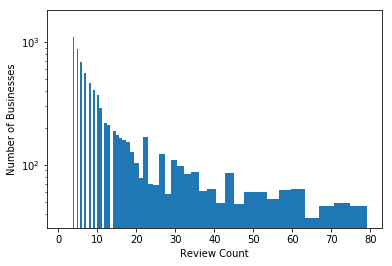

In [13]:
# TODO: Replace <FILL IN>
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.subplot(212)
plt.hist(businesses_review_counts, bins=logbins,log=True)
#plt.hist(businesses_review_counts, bins=np.logspace(np.log10(5),np.log10(100)),log=True)
#plt.gca().set_xscale("log")
plt.xlabel('Review Count')
plt.ylabel('Number of Businesses')

** Question: ** Plot the histogram of number of reviews written by users.

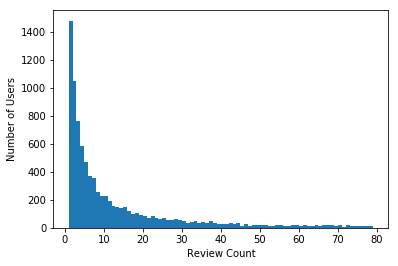

In [14]:
# TODO: Replace <FILL IN>

users_review_counts = users_rdd.map(lambda x:x['review_count']).collect()

plt.hist(users_review_counts, bins=range(1,80))
plt.xlabel('Review Count')
plt.ylabel('Number of Users')

** Question: ** Plot the above histogram but now on a log-log scale. Do you see a [Power Law](https://en.wikipedia.org/wiki/Power_law) relationship in the plot? Explain your answer.

** Answer: ** Yes a power law relationship can be seen indicating that more users(not so active ones) tend to give less reviews and less users(active ones) give more reviews. 

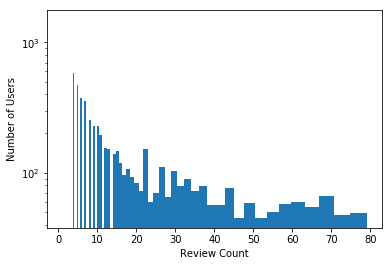

In [15]:
# TODO: Replace <FILL IN>

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(users_review_counts, bins=logbins,log=True)
plt.xlabel('Review Count')
plt.ylabel('Number of Users')

** Question: ** Plot the histogram of number of friends a Yelp user has.

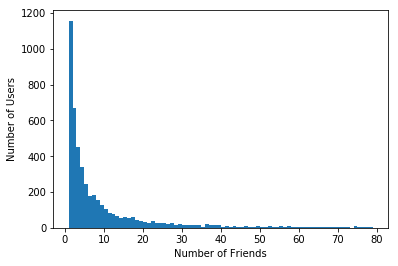

In [16]:
# TODO: Replace <FILL IN>

user_friend_counts = users_rdd.map(lambda x:len(x['friends'])).collect()
plt.hist(user_friend_counts, bins=range(1,80))
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')

** Question: ** Plot the above histogram but now on a log-log scale. Do you see a [Power Law](https://en.wikipedia.org/wiki/Power_law) relationship in the plot? Explain your answer.

** Answer: ** Yes a power law relationship can be seen indicating that more users(not so social ones) tend to have less friends and less users(more social ones) tend to have more friends. 

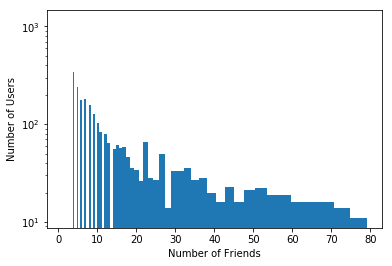

In [17]:
# TODO: Replace <FILL IN>
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(user_friend_counts, bins=logbins,log=True)
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')

** Question: ** Plot the histogram of number of fans a Yelp user has.

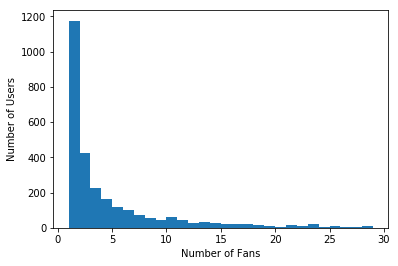

In [18]:
# TODO: Replace <FILL IN>

users_fan_counts =  users_rdd.map(lambda x:x['fans']).collect()

plt.hist(users_fan_counts, bins=range(1,30))
plt.xlabel('Number of Fans')
plt.ylabel('Number of Users')

** Question: ** Plot the above histogram but now on a log-log scale. Do you see a [Power Law](https://en.wikipedia.org/wiki/Power_law) relationship in the plot? Explain your answer.

** Answer: ** Yes a power law relationship can be seen indicating that more users(not so popular ones) tend to have less fans and less users(more popular ones) tend to have more fans.

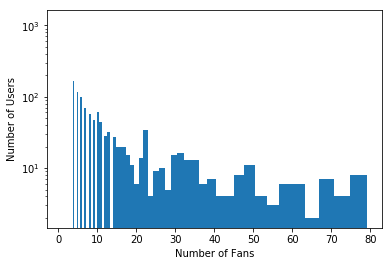

In [19]:
# TODO: Replace <FILL IN>
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(users_fan_counts, bins=logbins,log=True)
plt.xlabel('Number of Fans')
plt.ylabel('Number of Users')

** Question: ** Plot the histogram of number of checkins per Yelp business.

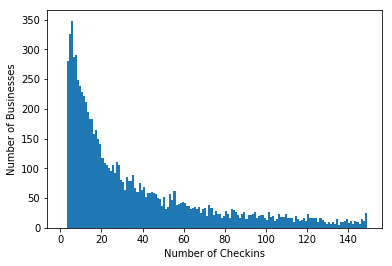

In [20]:
# TODO: Replace <FILL IN>

business_checkin_counts = checkins_rdd.map(lambda x:sum(x['checkin_info'].values())).collect()
plt.hist(business_checkin_counts, bins=range(1,150))
plt.xlabel('Number of Checkins')
plt.ylabel('Number of Businesses')

** Question: ** Plot the above histogram but now on a log-log scale. Do you see a [Power Law](https://en.wikipedia.org/wiki/Power_law) relationship in the plot? Explain your answer.

** Answer: ** Yes a power law relationship can be seen indicating that more businesses(not so popular ones) tend to have less checkins and less businesses(more popular ones) tend to have more checkins.

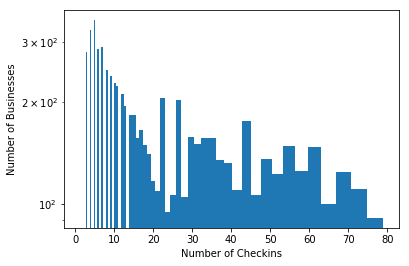

In [21]:
# TODO: Replace <FILL IN>

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(business_checkin_counts, bins=logbins,log=True)
plt.xlabel('Number of Checkins')
plt.ylabel('Number of Businesses')

** Question: ** Find the maximum value of checkins per business. Filter to obtain business IDs of businesses that had these maximum number of checkins. Fill in the code required to carry out these steps.

In [22]:
# TODO: Replace <FILL IN>
max_checkin_count = checkins_rdd.map(lambda x:sum(x['checkin_info'].values())).max()
business_ids_with_max_checkins = checkins_rdd.filter(lambda x:sum(x['checkin_info'].values())==max_checkin_count).map(lambda x:x['business_id']).collect()
len(business_ids_with_max_checkins)

1

In [23]:
business_ids_with_max_checkins

['hW0Ne_HTHEAgGF1rAdmR-g']

In [24]:
# TODO: Replace <FILL IN>

business_names_with_max_checkins = businesses_rdd \
    .filter(lambda x:x['business_id'] in business_ids_with_max_checkins) \
    .map(lambda x: (x['name'], x['city'])).collect()
business_names_with_max_checkins

[('Phoenix Sky Harbor International Airport', 'Phoenix')]

** Question: ** Why do you think the above list sees much higher checkins than other businesses in the dataset?

** Answer: ** This business is an Airport which hosts a number of shopping outlets and restaurants. It is easier to check in with an airport's name than an individual outlet( as per search history). Moreover, people who are travelling like to let their network know about their travel plans as a socializing behaviour. Also this is an international airport which has serves high number of customers.

** Question: ** Plot a histogram of the stars associated with business reviews.

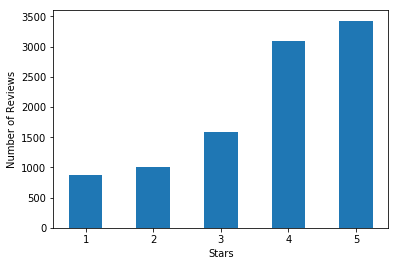

In [25]:
# TODO: Replace <FILL IN>

review_stars_counts = reviews_rdd.map(lambda x:x['stars']).collect()
plt.hist(review_stars_counts, bins=[x/2-0.25 for x in range(2, 12)])
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')

** Question: ** Plot a histogram of the number of reviews written per Yelp user.

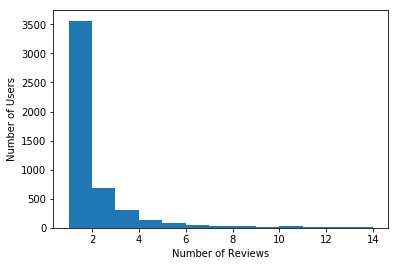

In [26]:
# TODO: Replace <FILL IN>

user_review_counts = list(reviews_rdd.map(lambda x:x['user_id']).countByValue().values())

plt.hist(user_review_counts, bins=[x for x in range(1, 15)])
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')

** Question: ** Plot a histogram of the number of reviews written per Yelp business.

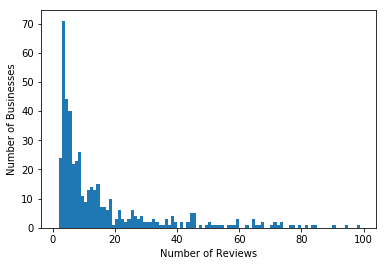

In [27]:
# TODO: Replace <FILL IN>

business_review_counts = list(reviews_rdd.map(lambda x:x['business_id']).countByValue().values())

plt.hist(business_review_counts, bins=[x for x in range(1, 100)])
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')

** Question: ** Plot a histogram of the number of useful votes received by Yelp reviews.

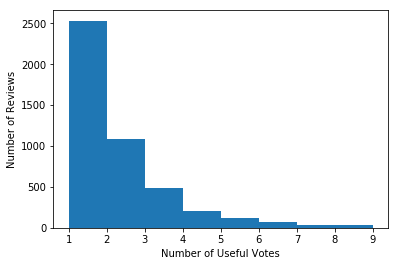

In [28]:
# TODO: Replace <FILL IN>

review_useful_counts = reviews_rdd.map(lambda x:x['votes']['useful']).collect()

plt.hist(review_useful_counts, bins=[x for x in range(1, 10)])
plt.xlabel('Number of Useful Votes')
plt.ylabel('Number of Reviews')

** Question: ** Plot a histogram of the number of funny votes received by Yelp reviews.

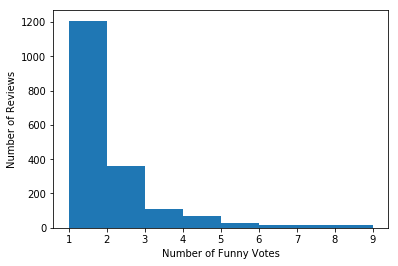

In [29]:
# TODO: Replace <FILL IN>

review_funny_counts = reviews_rdd.map(lambda x:x['votes']['funny']).collect()

plt.hist(review_funny_counts, bins=[x for x in range(1, 10)])
plt.xlabel('Number of Funny Votes')
plt.ylabel('Number of Reviews')

** Question: ** Plot a histogram of the number of cool votes received by Yelp reviews.

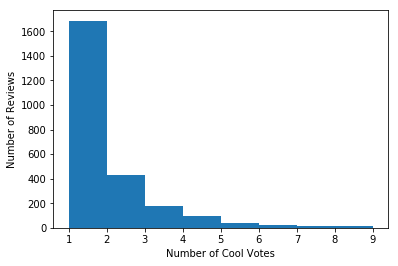

In [30]:
# TODO: Replace <FILL IN>

review_cool_counts = reviews_rdd.map(lambda x:x['votes']['cool']).collect()

plt.hist(review_cool_counts, bins=[x for x in range(1, 10)])
plt.xlabel('Number of Cool Votes')
plt.ylabel('Number of Reviews')

** Question: ** Plot a pair-plot of the number of useful, funny, and cool votes received by Yelp reviews alongwith the stars associated with the review and the length of the review.

In [31]:
review_votes_length = reviews_rdd.map(lambda x:(x['votes']['useful'],x['votes']['funny'],x['votes']['cool'],x['stars'],len(x['text'])))
print(review_votes_length.take(1))

[(7, 3, 7, 5, 626)]


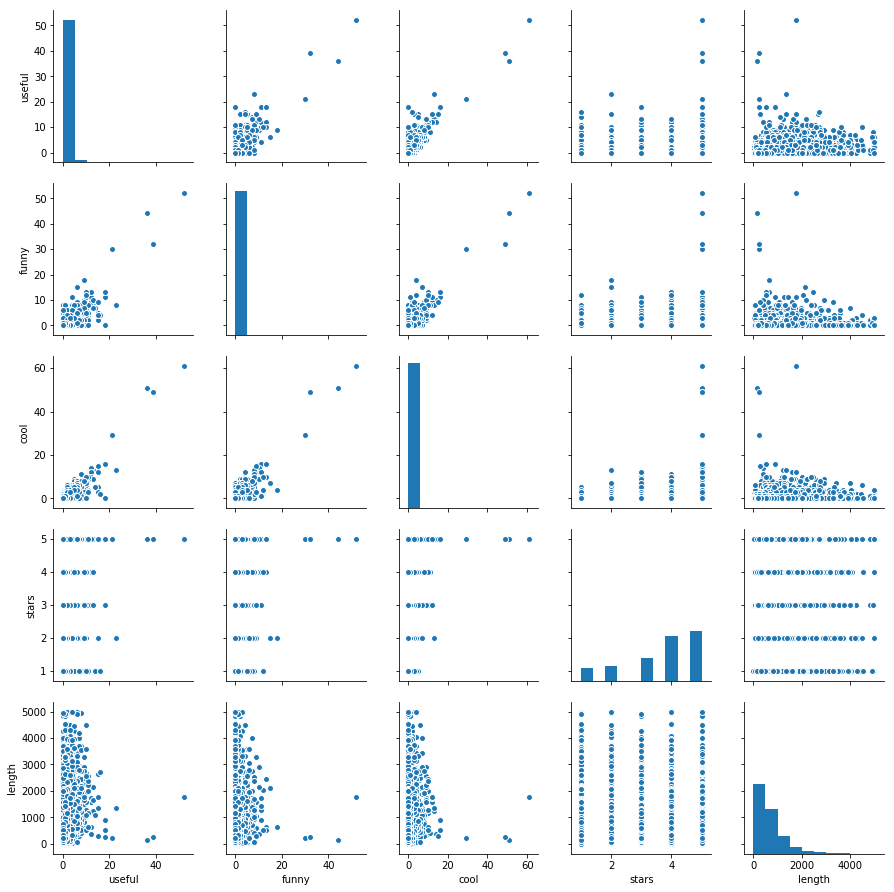

In [32]:
# TODO: Replace <FILL IN>

review_votes_length = reviews_rdd.map(lambda x:(x['votes']['useful'],x['votes']['funny'],x['votes']['cool'],x['stars'],len(x['text']))).collect()
review_votes_length_df = pd.DataFrame(review_votes_length, columns=['useful', 'funny', 'cool', 'stars', 'length'])
sns.pairplot(review_votes_length_df)

** Question: ** Let us plot the distribution of the number of words used by males and females in their reviews. We will use the lists "male_names" and "female_names" we had created earlier for this purpose. Let's first find the user IDs associated with males and females.

In [33]:
# TODO: Replace <FILL IN>

male_users = users_rdd.filter(lambda x:x['name']in male_names )
female_users = users_rdd.filter(lambda x:x['name']in female_names)

male_user_ids = male_users.map(lambda x:x['user_id']).collect()
female_user_ids = female_users.map(lambda x:x['user_id']).collect()

print (len(male_user_ids))
print (len(female_user_ids))
print (users_rdd.count())

4592
4697
10000


** Question: ** We can now use the user ID lists to separate the reviews into those by males and females and calculate the length of each review.

In [34]:
# TODO: Replace <FILL IN>

male_reviews = reviews_rdd.filter(lambda x:x['user_id'] in male_user_ids).map(lambda x : x['text'])
female_reviews = reviews_rdd.filter(lambda x:x['user_id'] in female_user_ids).map(lambda x : x['text'])

male_word_count = male_reviews.map(lambda x : len(x))
female_word_count = female_reviews.map(lambda x : len(x))

print ('Male and female review length averages: ', round(male_word_count.mean()),'and', round(female_word_count.mean()))

Male and female review length averages:  557 and 732


** Question: ** The code below calculates the distributions of review lengths for males and female reviewers and plots them. Do you see a marked difference between the average review length of male and female reviewers? Are there any major trends or differences between the distributions of review length of male and female reviewers?

** Answer: ** Yes we see a marked difference. The average review length for females is more than the average review length for males by approx 32%.
Minor Trends:
1.Every review seems to be unique in its number of words. But males tends to use similar number of words as compared to females(9 vs 6 spikes). 2. Males tend to have similar words in the low-mid range(0-500) whereas this range for males is arround 700.


In [35]:
male_word_distribution = list(male_word_count.map(lambda x : (x,1)).countByKey().items())
female_word_distribution = list(female_word_count.map(lambda x : (x,1)).countByKey().items())

male_word_distribution = sorted(male_word_distribution, key=lambda x: x[0])
female_word_distribution = sorted(female_word_distribution, key=lambda x: x[0])

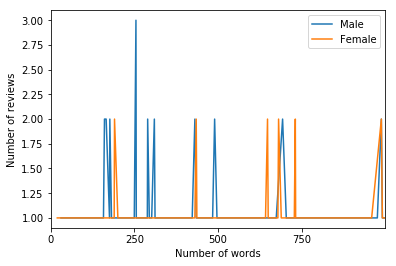

In [36]:
fig, ax = plt.subplots()
ax.plot([x[0] for x in male_word_distribution], [x[1] for x in male_word_distribution], label = 'Male')
ax.plot([x[0] for x in female_word_distribution], [x[1] for x in female_word_distribution], label = 'Female')

ax.set_xlim((0, 1000))
ax.set_xticks([0, 250, 500, 750])
ax.set_xticklabels(['0', '250','500','750'])

plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.legend()

# ** Part 2: Classification using tree ensemble methods **

In this section, we will predict the number of funny votes that a review has earned, indicating how funny readers found the review.

In [37]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.linalg import Vectors, DenseVector, SparseVector
from pyspark.mllib.regression import LabeledPoint

** Question: ** Fill in the necessary code to calculate word counts from text reviews below.

In [38]:
# TODO: Replace <FILL IN>
import re
max_words = 50000
#re.sub(r'[^\w\s]',''
all_reviews = reviews_rdd.map(lambda x : (x['text'], x['votes']['funny']))
word_counts = list(all_reviews.flatMap(lambda x:x[0].split()).map(lambda x: (x,1)).countByKey().items())
word_counts = sorted(word_counts, key=lambda x: -x[1])

unique_words = [x[0] for x in word_counts[:max_words]]
num_unique_words = len(unique_words)
print('Number of unique words: ', num_unique_words)

Number of unique words:  50000


** Question: ** We will now construct two dictionaries - one which maps from each word to a unique integer index and the second one which maps back from the index to the word. Write the code required to do this.

In [39]:
# TODO: Replace <FILL IN>

word_to_index_dict = {unique_words[i]:i for i in range(len(unique_words))}
index_to_word_dict = {i:unique_words[i] for i in range(len(unique_words))}

** Question: ** Fill in the required code below to obtain a LabeledPoint RDD that can be used to train an mllib classifier/regressor.

In [40]:
# TODO: Replace <FILL IN>

doc_vectors = all_reviews.map(lambda x: (x[1], x[0].split())).map(lambda x: (x[0], [word_to_index_dict[w] for w in x[1] if w in word_to_index_dict]))
#doc_vectors = doc_vectors.map(lambda x: LabeledPoint(x[0],x[1]))
doc_vectors = doc_vectors.map(lambda x: LabeledPoint(x[0],SparseVector(num_unique_words,np.unique(sorted(x[1])), [1.0]*len(np.unique(x[1])))))
print(doc_vectors.count())
print(doc_vectors.take(2))

10000
[LabeledPoint(3.0, (50000,[0,1,2,4,6,8,9,12,13,15,16,19,21,24,38,41,47,57,86,105,106,118,159,161,180,187,208,236,248,255,262,319,350,351,413,440,464,555,688,729,818,883,884,930,1138,1184,1434,1485,1660,2614,2929,3468,3649,3758,3759,3760,3761,3871,3872,3975,4487,4644,5049,5302,6177,7448,9372,10394,10395,13414,15997,15998,20279,20280,20281,29227,29228,29229,29230,29231,29232,29233],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])), LabeledPoint(1.0, (50000,[0,4,5,8,9,18,19,33,36,39,43,62,71,80,89,97,113,131,207,232,236,238,293,295,310,394,407,413,441,442,489,574,866,899,1026,2614,4645,4646,5303,7449,13415,13416,20282],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

** Question: ** Randomly split the doc_vectors RDD into 80% training and 20% validation data.

In [41]:
# TODO: Replace <FILL IN>

doc_vectors_train, doc_vectors_val = doc_vectors.randomSplit([0.8,0.2])

** Question: ** Let us implement the baseline predictor which always outputs the most common value of funny votes. Fill in appropriate code.

In [42]:
import statistics as st
d= st.mode(doc_vectors_train.map(lambda x:x.label).collect())
d

0.0

In [43]:
# TODO: Replace <FILL IN>
most_common_prediction =  st.mode(doc_vectors_train.map(lambda x:x.label).collect())
labels_and_predictions = doc_vectors_val.map(lambda lp: (lp.label, most_common_prediction))
val_mse = labels_and_predictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum() /\
    float(doc_vectors_val.count())
print('Validation Root Mean Squared Error (Baseline) = ' + str(val_mse))
print('Learned baseline prediction: ', most_common_prediction)

Validation Root Mean Squared Error (Baseline) = 1.076351016360932
Learned baseline prediction:  0.0


** Question: ** Let us now use a Decision Tree to predict the number of funny votes. Set the maximum depth of the tree to 5 and use an appropriate impurity metric for regression.

In [44]:
# TODO: Replace <FILL IN>

dt_model = DecisionTree.trainRegressor(doc_vectors_train,categoricalFeaturesInfo={},impurity="variance",maxDepth=5)

predictions = dt_model.predict(doc_vectors_val.map(lambda x: x.features))
labels_and_predictions = doc_vectors_val.map(lambda lp: lp.label).zip(predictions)
val_mse = labels_and_predictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum() /\
    float(doc_vectors_val.count())
print('Validation Root Mean Squared Error (Decision Tree) = ' + str(val_mse))
print('Learned regression tree model:')
print(dt_model.toDebugString())

Validation Root Mean Squared Error (Decision Tree) = 1.2755271005434137
Learned regression tree model:
DecisionTreeModel regressor of depth 5 with 15 nodes
  If (feature 23574 <= 0.5)
   If (feature 23590 <= 0.5)
    If (feature 21815 <= 0.5)
     If (feature 21377 <= 0.5)
      If (feature 16708 <= 0.5)
       Predict: 0.3100551654964895
      Else (feature 16708 > 0.5)
       Predict: 13.0
     Else (feature 21377 > 0.5)
      Predict: 15.0
    Else (feature 21815 > 0.5)
     Predict: 18.0
   Else (feature 23590 > 0.5)
    If (feature 1 <= 0.5)
     Predict: 32.0
    Else (feature 1 > 0.5)
     Predict: 30.0
  Else (feature 23574 > 0.5)
   If (feature 1 <= 0.5)
    Predict: 44.0
   Else (feature 1 > 0.5)
    Predict: 52.0



# ** Part 3: Collaborative filtering for recommendation **

In this section, we will tackle a [collaborative filtering](https://en.wikipedia.org/wiki/Collaborative_filtering) task which can be used to recommend businesses to users based on the ratings they have already assigned to some businesses they have visited.

In [45]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

** Question: ** Let us first determine the unique user and business IDs that appear in the reviews data. This will help us build dictionaries for mapping the user/business IDs to unique integer indices. Fill in the required code to build these dictionaries below.

In [46]:
# TODO: Replace <FILL IN>

review_user_ids = reviews_rdd.map(lambda x:x['user_id']).collect()
review_business_ids = reviews_rdd.map(lambda x:x['business_id']).collect()

user_to_index_dict = {review_user_ids[i]:i for i in range(len(review_user_ids))}
business_to_index_dict = {review_business_ids[i]:i for i in range(len(review_business_ids))}

** Question: ** Next, transform each review into a rating. The Rating object takes a unique user index, a unique business index, and float-valued rating.

In [47]:
# TODO: Replace <FILL IN>

ratings_rdd = reviews_rdd.map(lambda x: Rating(user_to_index_dict[x['user_id']],business_to_index_dict[x['business_id']],float(x['stars']) ))
print(ratings_rdd.take(2))

[Rating(user=0, product=2, rating=5.0), Rating(user=1, product=2, rating=2.0)]


** Question: ** Let us randomly split data into 80% train and 20% validation set.

In [48]:
# TODO: Replace <FILL IN>

ratings_rdd_train, ratings_rdd_val = ratings_rdd.randomSplit([0.8,0.2])

** Question: ** For a succession of ranks, we will now build an collaborative filtering algorithm using ALS (Alternating Least Squares). We will use the model to obtain train as well as validation RMSE for each rank. In the cell below, you can fill in the code to carry out the model-building, prediction, and RMSE calculation.

In [49]:
# TODO: Replace <FILL IN>

numIterations=10
ranks = list(range(10, 201, 20))
train_rmses = []
val_rmses = []

for rank in ranks:
    cf_model = ALS.train(ratings_rdd_train, rank, numIterations)
    
    train_data = ratings_rdd_train.map(lambda p: (p[0], p[1]))
    predictions = cf_model.predictAll(train_data).map(lambda r: ((r[0], r[1]), r[2]))
    rates_and_preds = ratings_rdd_train.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
    train_rmse = np.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
    train_rmses.append(train_rmse)
    
    val_data = ratings_rdd_val.map(lambda p: (p[0], p[1]))
    predictions = cf_model.predictAll(val_data).map(lambda r: ((r[0], r[1]), r[2]))
    rates_and_preds = ratings_rdd_val.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
    val_rmse = np.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
    val_rmses.append(val_rmse)
    
    print("Root Mean Squared Error (rank={}) = Train {}, Validation {}".format(rank, train_rmse, val_rmse))

Root Mean Squared Error (rank=10) = Train 0.21684214909043503, Validation 3.600879200067159
Root Mean Squared Error (rank=30) = Train 0.18693167609647263, Validation 2.2897007407210292
Root Mean Squared Error (rank=50) = Train 0.18679171322768937, Validation 2.068550048878911
Root Mean Squared Error (rank=70) = Train 0.18675900164857404, Validation 1.9588860756140052
Root Mean Squared Error (rank=90) = Train 0.18676934775826254, Validation 1.927774132650176
Root Mean Squared Error (rank=110) = Train 0.18674967228556275, Validation 1.926942122764444
Root Mean Squared Error (rank=130) = Train 0.18675112542758662, Validation 1.9302306976653483
Root Mean Squared Error (rank=150) = Train 0.1867477133230738, Validation 1.9283294321976008
Root Mean Squared Error (rank=170) = Train 0.18674553457835336, Validation 1.895854042090177
Root Mean Squared Error (rank=190) = Train 0.1867498889037743, Validation 1.8996218671799985


** Question: ** Let us plot the train and validation RMSE versus the rank. The code below does this for you. Based on this plot, what would your choice of the rank hyperparameter be? Is this choice conclusive or do we need to conduct a more extensive hyperparameter search at larger ranks than the ones we have evaluated?

** Answer: ** Choice of rank hyperparameter is 50(the knee). This choice is conclusive because the validation is constant for higher values of rank(>50) and there is no need for further hypertuning.

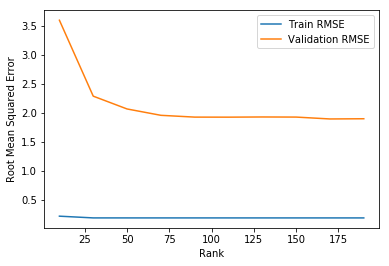

In [50]:
fig, ax = plt.subplots()
ax.plot(ranks, train_rmses, label='Train RMSE')
ax.plot(ranks, val_rmses, label='Validation RMSE')

plt.xlabel('Rank')
plt.ylabel('Root Mean Squared Error')
plt.legend()

# ** Part 4: Word2Vec for text reviews **

In this section, we will fit a [Word2Vec](https://en.wikipedia.org/wiki/Word2vec) model to the Yelp reviews text. Word2Vec is a popular model for embedding words in Euclidean space so they can be analyzed similar to real-valued vectors. Contrary to popular belief, Word2Vec models are not deep neural models. Inspite of being shallow neural networks, they capture word associations and analogies remarkably well. 

In [51]:
from pyspark.mllib.feature import Word2Vec
import re
pattern = re.compile('[\W_]+')

In [52]:
review_docs = reviews_rdd.map(lambda x : x['text'].lower().split())
review_docs = review_docs.map(lambda x : [pattern.sub('', w) for w in x])
print(review_docs.take(2))

[['thank', 'you', 'rob', 'i', 'truly', 'appreciated', 'all', 'the', 'help', 'i', 'received', 'from', 'this', 'agent', 'today', 'who', 'was', 'able', 'to', 'removed', 'the', 'extra', 'charges', 'on', 'my', 'bill', 'that', 'the', 'pasadena', 'verizon', 'store', 'on', 'lake', 'was', 'charging', 'me', 'on', 'my', 'bill', 'for', 'upgrading', 'my', 'phone', 'when', 'i', 'went', 'in', 'i', 'was', 'having', 'problems', 'with', 'my', 'blacberry', 'and', 'had', 'to', 'switch', 'to', 'the', 'iphone', 'last', 'week', 'rob', 'from', 'the', 'pennsylvania', 'store', 'who', 'i', 'was', 'connected', 'today', 'was', 'able', 'to', 'look', 'at', 'my', 'bill', 'and', 'all', 'the', 'notes', 'and', 'correct', 'the', 'problem', 'immediately', 'great', 'customer', 'service', 'he', 'even', 'set', 'up', 'a', 'follow', 'up', 'phone', 'call', 'with', 'me', 'on', 'july', '5th', 'to', 'make', 'sure', 'the', 'credit', 'goes', 'through', 'on', 'my', 'billi', 'cant', 'thank', 'him', 'enough'], ['after', 'waiting', 'for

** Question: ** Fit a Word2Vec model to the review_docs RDD. Set the size of embedding vectors to 10, the random seed to 42, and the number of iterations to 10.

In [53]:
# TODO: Replace <FILL IN>
word2vec_model=Word2Vec().setVectorSize(10).setSeed(42).setNumIterations(10).fit(review_docs)

Let's us examine what words are closely associated with some example words. Run the cell below to see word associations. Feel free to add any additional words whose results you find interesting, but do not delete any of the words already in the list.

In [54]:
for word in ['salt', 'pepper', 'restaurant', 'italian', 'indian', 'chinese', 'direction', 'pittsburgh', 'burgh', 'city', 'location', 'cmu', 'pizza','ny']:
    syms = word2vec_model.findSynonyms(word, 5)
    print('Words most similar to ', word, ' : ', [s[0] for s in syms])

Words most similar to  salt  :  ['deep', 'powder', 'tomatoes', 'mayo', 'cilantro']
Words most similar to  pepper  :  ['peppers', 'onions', 'mushrooms', 'parmesan', 'dipping']
Words most similar to  restaurant  :  ['soho', 'location', 'lowkey', 'scene', 'nonsmoking']
Words most similar to  italian  :  ['traditional', 'american', 'chock', 'gourmet', 'authentic']
Words most similar to  indian  :  ['superior', 'chinese', 'vietnamese', 'comfort', 'rad']
Words most similar to  chinese  :  ['joint', 'popular', 'joints', 'cuisine', 'indian']
Words most similar to  direction  :  ['schools', 'failing', 'stories', 'strike', 'foot']
Words most similar to  pittsburgh  :  ['nyc', 'pgh', 'bloomfield', 'los', 'burgh']
Words most similar to  burgh  :  ['pittsburgh', 'los', 'nyc', 'closest', 'region']
Words most similar to  city  :  ['theatre', 'suburbs', 'oakland', 'suburb', 'country']
Words most similar to  location  :  ['dead', 'arbys', 'theater', 'neighborhood', 'mall']
Words most similar to  cmu  :

** Question: ** What "synonyms" in the result above give rise to perfect analogies? Are there words in the result that are spurious and not good substitutes for the originally supplied word?

** Answer: ** As far as a perfect analogy is concerned, results for restaurant seems to be considerably better than the others. Results for location,pepper,city,pizza are also fairly consistent. There are multiple spurious words as below:
salt: deep,tomatoes,mayo,cilantro
italian:chock
indian: vietnamese,rad
chinese: indian
direction: stories,strike
pittsburgh: los,nyc
burgh: los,closest,nyc
location: dead
cmu: devnver
ny: yinzer,sola

# ** Part 5: Frequent pattern mining using FP-Growth algorithm **

In this section, we will mine frequent subsets of items that appear together in datapoints. This type of analysis is also known as frequent itemset mining or market basket analysis. Since the tags associated with Yelp businesses are sets, we can use them to carry out the frequent item set mining by employing the FP-Growth algorithm available in Spark.

In [55]:
from pyspark.mllib.fpm import FPGrowth

** Question: ** Fill in the required code to perform itemset mining on business categories represented as an RDD of sets. Train the FP-Growth algorithm with a minimum support parameter of 0.01 and 10 partitions.

In [56]:
# TODO: Replace <FILL IN>

business_categories = businesses_rdd.map(lambda x:x['categories'])

fpgrowth_model = FPGrowth.train(business_categories, minSupport=0.01, numPartitions=10)
result = sorted(fpgrowth_model.freqItemsets().collect(), key=lambda x: -x[1])
k=list()
for fi in result:
    if len(fi[0]) > 1:
        k.append(fi[0])
        print(fi)
    

FreqItemset(items=['Fast Food', 'Restaurants'], freq=496)
FreqItemset(items=['Bars', 'Nightlife'], freq=464)
FreqItemset(items=['American (Traditional)', 'Restaurants'], freq=455)
FreqItemset(items=['Fashion', 'Shopping'], freq=423)
FreqItemset(items=['Pizza', 'Restaurants'], freq=381)
FreqItemset(items=['Mexican', 'Restaurants'], freq=352)
FreqItemset(items=['Auto Repair', 'Automotive'], freq=349)
FreqItemset(items=['Sandwiches', 'Restaurants'], freq=345)
FreqItemset(items=['Home & Garden', 'Shopping'], freq=309)
FreqItemset(items=['Doctors', 'Health & Medical'], freq=304)
FreqItemset(items=['Chinese', 'Restaurants'], freq=300)
FreqItemset(items=['Nightlife', 'Restaurants'], freq=297)
FreqItemset(items=['Bars', 'Nightlife', 'Restaurants'], freq=278)
FreqItemset(items=['Bars', 'Restaurants'], freq=278)
FreqItemset(items=['Burgers', 'Restaurants'], freq=275)
FreqItemset(items=['Hotels & Travel', 'Event Planning & Services'], freq=268)
FreqItemset(items=['Hotels', 'Hotels & Travel'], fre

** Question: ** Fill in the required code to perform itemset mining on business categories represented as an RDD of sets. Train the FP-Growth algorithm with a minimum support parameter of 0.001 and 10 partitions.

In [57]:
#for i in k:
 #   #print(i)
  #  if i in l:
   #     pass
   # else:
    #    print("woooop",k)

In [58]:
# TODO: Replace <FILL IN>

fpgrowth_model = FPGrowth.train(business_categories, minSupport=0.001, numPartitions=10)
result = sorted(fpgrowth_model.freqItemsets().collect(), key=lambda x: -x[1])
l=list()
for fi in result:
    if len(fi[0]) > 1:
        l.append(fi[0])
        print(fi,)

FreqItemset(items=['Fast Food', 'Restaurants'], freq=496)
FreqItemset(items=['Bars', 'Nightlife'], freq=464)
FreqItemset(items=['American (Traditional)', 'Restaurants'], freq=455)
FreqItemset(items=['Fashion', 'Shopping'], freq=423)
FreqItemset(items=['Pizza', 'Restaurants'], freq=381)
FreqItemset(items=['Mexican', 'Restaurants'], freq=352)
FreqItemset(items=['Auto Repair', 'Automotive'], freq=349)
FreqItemset(items=['Sandwiches', 'Restaurants'], freq=345)
FreqItemset(items=['Home & Garden', 'Shopping'], freq=309)
FreqItemset(items=['Doctors', 'Health & Medical'], freq=304)
FreqItemset(items=['Chinese', 'Restaurants'], freq=300)
FreqItemset(items=['Nightlife', 'Restaurants'], freq=297)
FreqItemset(items=['Bars', 'Nightlife', 'Restaurants'], freq=278)
FreqItemset(items=['Bars', 'Restaurants'], freq=278)
FreqItemset(items=['Burgers', 'Restaurants'], freq=275)
FreqItemset(items=['Hotels & Travel', 'Event Planning & Services'], freq=268)
FreqItemset(items=['Hotels', 'Hotels & Travel'], fre

** Question: ** Are all the itemsets obtained by setting minimum support 0.01 included in the itemsets obtained when we set the minimum support to 0.001?

** Answer: ** Yes. Minimum support of 0.001 indicates that if the items appear 1 out of 1000 times,it will be counted as  frequent whereas minimum support of 0.01 indicates that if the items appear 10 out of 1000 times,it will be counted as frequenti.e 0.01 has a lower threshold and the frequent words in this case will be included in 0.001 support level.